In [46]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [47]:
# Define the edge detector function
# Here, weak_th and strong_th are the thresholds
def Canny_detector(img, weak_th=None, strong_th=None):

    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculate gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Convert Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Set the minimum and maximum thresholds for double thresholding
    mag_max = np.max(mag)
    if weak_th is None:
        weak_th = mag_max * 0.1
    if strong_th is None:
        strong_th = mag_max * 0.5

    # Get the dimensions of the input image
    height, width = img.shape

    # Non-maximum suppression
    for i_x in range(width):
        for i_y in range(height):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang - 180) if abs(grad_ang) > 180 else abs(grad_ang)

            # Select the target pixels based on the gradient direction
            if grad_ang <= 22.5:
                neighb_1_x, neighb_1_y = i_x - 1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            elif 22.5 < grad_ang <= 67.5:
                neighb_1_x, neighb_1_y = i_x - 1, i_y - 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            elif 67.5 < grad_ang <= 112.5:
                neighb_1_x, neighb_1_y = i_x, i_y - 1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            elif 112.5 < grad_ang <= 157.5:
                neighb_1_x, neighb_1_y = i_x - 1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y - 1
            else:
                neighb_1_x, neighb_1_y = i_x - 1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # Non-maximum suppression step
            if width > neighb_1_x >= 0 and height > neighb_1_y >= 0:
                if mag[i_y, i_x] < mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x] = 0
                    continue
            if width > neighb_2_x >= 0 and height > neighb_2_y >= 0:
                if mag[i_y, i_x] < mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x] = 0

    # Double thresholding
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)
    ids = np.zeros_like(img)

    for i_x in range(width):
        for i_y in range(height):
            grad_mag = mag[i_y, i_x]
            if grad_mag < weak_th:
                mag[i_y, i_x] = 0
            elif strong_th > grad_mag >= weak_th:
                ids[i_y, i_x] = 1
            else:
                ids[i_y, i_x] = 2

    # Return the gradient magnitude of the edges
    return mag


In [48]:
# Read the image
frame = cv2.imread('gambar/buah.png')

In [49]:
# Call the function designed to find edges
canny_img = Canny_detector(frame)

<Figure size 640x480 with 0 Axes>

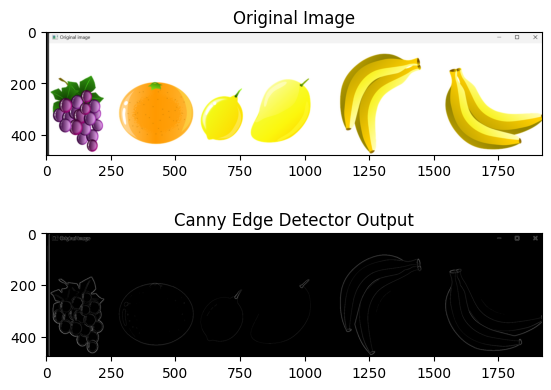

In [50]:
# Display the input and output images
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plots[0].set_title('Original Image')
plots[1].imshow(canny_img, cmap='gray')
plots[1].set_title('Canny Edge Detector Output')
plt.show()